# Exploratory data analysis & Cleaning Data

#### In this file I will :
- Try to find different insights from the data.
- Clean the data, for the encoder and decoder model.

### Data Source : [manythings.org](https://www.manythings.org/anki/)

The data file contains 2 languages English and French. We are trying to convert French to English in this project.

## Note : I have created a python module which contains all the functions which are being used in this project.
## The file is "NMT_Module.py"

### Defining Path

In [1]:
import os
data_file_path = r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\fra-eng\fra.txt'
## get the path in the format required by OS
data_file_path = os.path.join(data_file_path)

### Opening the file and reading it's Content

In [2]:
import numpy as np
import pandas as pd

In [3]:
## reading a text file in the dataframe, the format of this file is like csv, seperated by tab
dataframe = pd.read_csv(data_file_path, encoding='utf-8', sep='\t',  names=['English', 'French', 'Source'])
dataframe.sample(5)

,English,French,Source
203327,The Olympic Games are held every four years.,Les Jeux Olympiques sont organisés tous les qu...,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
192968,I don't believe anything you say anymore.,Je ne crois plus rien de ce que tu dis.,CC-BY 2.0 (France) Attribution: tatoeba.org #5...
154353,This story has an unhappy ending.,Cette histoire se termine mal.,CC-BY 2.0 (France) Attribution: tatoeba.org #3...
172460,The tire factory employs 250 people.,L'usine de pneus emploie 250 personnes.,CC-BY 2.0 (France) Attribution: tatoeba.org #6...
38809,You're very clever.,Vous êtes très habiles.,CC-BY 2.0 (France) Attribution: tatoeba.org #2...


#### Drop Attribution

In [4]:
## droping the unrequired column.
dataframe.drop(['Source'], axis=1, inplace=True)

In [5]:
dataframe.sample(5)

,English,French
186901,The leaves on the tree have turned red.,"Les feuilles, sur l'arbre, ont viré au rouge."
173423,We're moving in the right direction.,Nous nous dirigeons dans la bonne direction.
14711,Don't interrupt.,N'interrompez pas !
1626,Try it on.,Essaie-le !
42578,Keep an eye on them.,Gardez un œil sur eux.


#### Check missing values

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229803 entries, 0 to 229802
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   English  229803 non-null  object
 1   French   229803 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [7]:
dataframe.isna().sum()

English    0
French     0
dtype: int64

####  Note: We do not have any missing values

### Cleaning Data

#### Removing extra spaces
- This is done so that the process of tokenization becomes easy

In [8]:
dataframe.English = dataframe.English.apply(lambda x: " ".join(x.split()))
dataframe.French = dataframe.French.apply(lambda x: " ".join(x.split()))

#### Converting English to lowercase
- Since we are just concerned about translation of one word to another, it is better to keep all the words in one case

In [9]:
def lower_text(text) :
    '''Function which converts text into lower text'''
    return text.lower()

In [10]:
dataframe['English'] = dataframe['English'].apply(lower_text)
dataframe['French'] = dataframe['French'].apply(lower_text)

In [11]:
dataframe.tail()

,English,French
229798,death is something that we're often discourage...,la mort est une chose qu'on nous décourage sou...
229799,since there are usually multiple websites on a...,puisqu'il y a de multiples sites web sur chaqu...
229800,if someone who doesn't know your background sa...,si quelqu'un qui ne connaît pas vos antécédent...
229801,it may be impossible to get a completely error...,il est peut-être impossible d'obtenir un corpu...
229802,i went drinking with one of my boyfriend's fri...,« je suis allée boire avec un ami de mon compa...


#### Expansion of text
- Some words like "doesn't" can be written as two seperate words "does not". So to keep more context we will expand such words.

In [12]:
import contractions
## Contraction library has fix () which expands each word in a given senetence.

In [13]:
def expand_text(text) :
    '''This function expands all the words in a given sentence.'''
    return contractions.fix(text)

In [14]:
dataframe['English'] = dataframe['English'].apply(expand_text)

In [15]:
example_text = "I don't know what he'll have"
expanded_text = expand_text(example_text)

print("Contracted ->", example_text)
print("Expanded ->", expanded_text)

Contracted -> I don't know what he'll have
Expanded -> I do not know what he will have


#### Remove digits -> Words which have numbers in them have no meaning. So let's remove them.
- First we will check if there are any sentences which have digits in them.

In [16]:
import re

In [17]:
def check_digits(text) :
    if re.fullmatch(r"\d+", text) :
        return True
    return False

In [18]:
dataframe['is_digit'] = dataframe['English'].apply(check_digits)
dataframe['is_digit'].sum()

0

In [19]:
dataframe.drop(['is_digit'], axis=1, inplace = True)

#### Note : There are no numerics in the text

#### Removing Puntuations
- Although we should keep punctuations as it will maintain the context of the sentence.
- 

In [20]:
import string

In [21]:
translator = str.maketrans('', '', string.punctuation)

In [22]:
dataframe["English"] = dataframe['English'].apply(lambda x : x.translate(translator))
dataframe["French"] = dataframe['French'].apply(lambda x : x.translate(translator))

In [23]:
dataframe.sample(5)

,English,French
223190,i would rather clean my room than spend time d...,je ferais mieux de nettoyer ma chambre que de ...
33349,i do not deserve it,je ne le mérite pas
152518,i am sure that we can manage that,je suis certaine que nous pouvons gérer cela
139910,tom knew he was being followed,tom savait quil était suivi
35927,stop your nonsense,cesse tes bêtises


### Visualizing Some Features
- For an encoder decoder architecture the data required must be passed in a sequence.
- For such cases we need to consider the length of the sentences due to BLEU score.

### Analyzing length of text by number of  words and number of characters.

#### Create new column for word count

In [24]:
def count_words(sentence) :
    return len(sentence.split(' '))

In [25]:
dataframe['Eng_word_count'] = dataframe['English'].apply(count_words)
dataframe['French_word_count'] = dataframe['French'].apply(count_words)

#### Create new column for character count

In [26]:
def count_char(sentence) :
    return len(sentence)

In [27]:
dataframe['Eng_char_count'] = dataframe['English'].apply(count_char)
dataframe['French_char_count'] = dataframe['French'].apply(count_char)

In [28]:
dataframe.sample(5)

,English,French,Eng_word_count,French_word_count,Eng_char_count,French_char_count
219188,i do not want to pay through the nose for a ho...,je ne veux pas payer une chambre dhôtel à prix...,13,11,54,50
163757,i cannot believe we finally made it,je narrive pas à croire que nous y avons final...,7,11,35,58
164076,i do not see what the fuss is about,je ne vois pas la raison de faire toutes ces h...,9,11,35,54
214936,tom is wearing the sunglasses he bought yesterday,tom porte les lunettes de soleil quil a acheté...,8,10,49,53
136252,i need to be alone for a while,jai besoin de me trouver seul un moment,8,8,30,39


### Creating Distribution Plots

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Plot for English Words Count

<Axes: xlabel='Eng_word_count', ylabel='Density'>

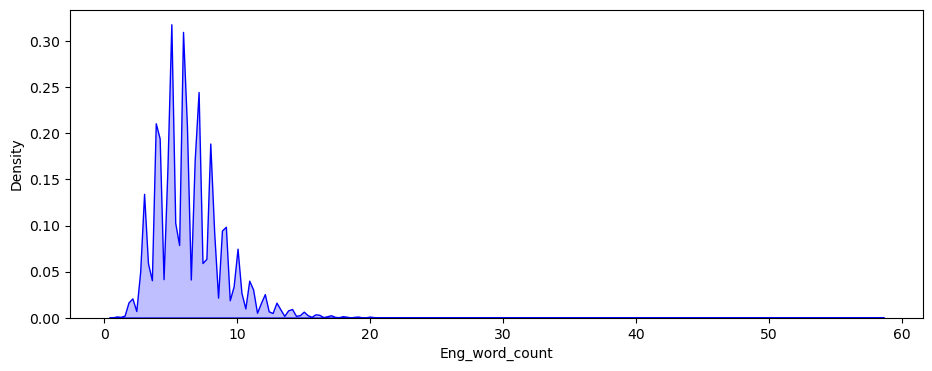

In [30]:
plt.figure(figsize=(11,4))
sns.kdeplot(x=dataframe.Eng_word_count, shade=True, color='blue', label='Real')

#### Note : Most English sentences has length of 4 words.

#### Plot for French Words Count

<Axes: xlabel='French_word_count', ylabel='Density'>

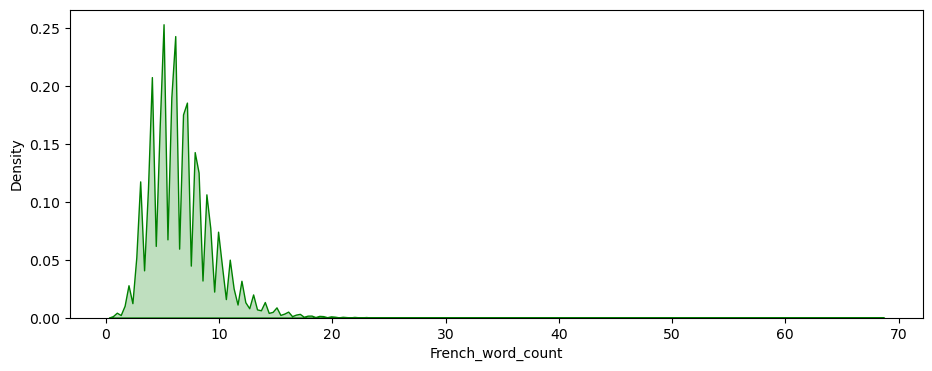

In [31]:
plt.figure(figsize=(11,4))
sns.kdeplot(x=dataframe.French_word_count, shade=True, color='green', label='Real')

#### Note : Most French sentences has length of 4 words.

#### Plot for english char count

<Axes: xlabel='Eng_char_count', ylabel='Density'>

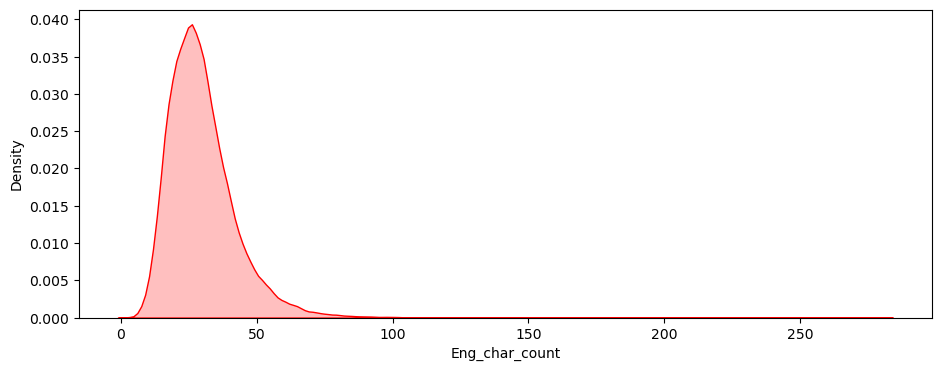

In [32]:
plt.figure(figsize=(11,4))
sns.kdeplot(x=dataframe.Eng_char_count, shade=True, color='red', label='Real')

#### Note : Most English sentences has length of approx. 30 characters.

#### Plot for french char count

<Axes: xlabel='French_char_count', ylabel='Density'>

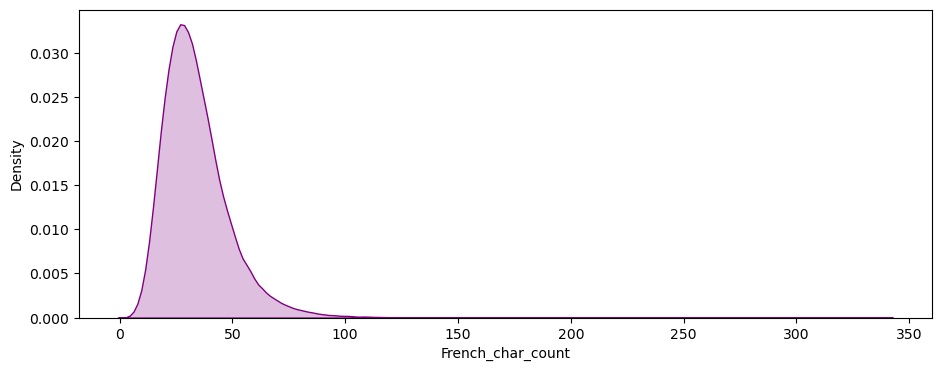

In [33]:
plt.figure(figsize=(11,4))
sns.kdeplot(x=dataframe.French_char_count, shade=True, color='purple', label='Real')

#### Note : Most English sentences has length of approx. 35 characters.

### Note: By visualizing count, we can see that every curve follows a Normal distribution.

### Creating Word Cloud

In [34]:
from wordcloud import WordCloud

In [35]:
def plot_word_cloud(data):
    ## for wordcloud to be made we need a string of all words seperated by spaces.
    words=""
    ## iterating sentences in the list of sentences.
    for sent in data:
        sent= str(sent)
        ## lowecase the sentece
        sent=sent.lower()
        ## get list of words
        tokens= sent.split()
        ## create a big string of all words in all sentences.
        words +=" ".join(tokens)+" "
    ## plot the wordcloud
    plt.figure(figsize=(15,12))
    wordcloud= WordCloud(width=800,height=400, background_color = 'white').generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

#### English Word Cloud

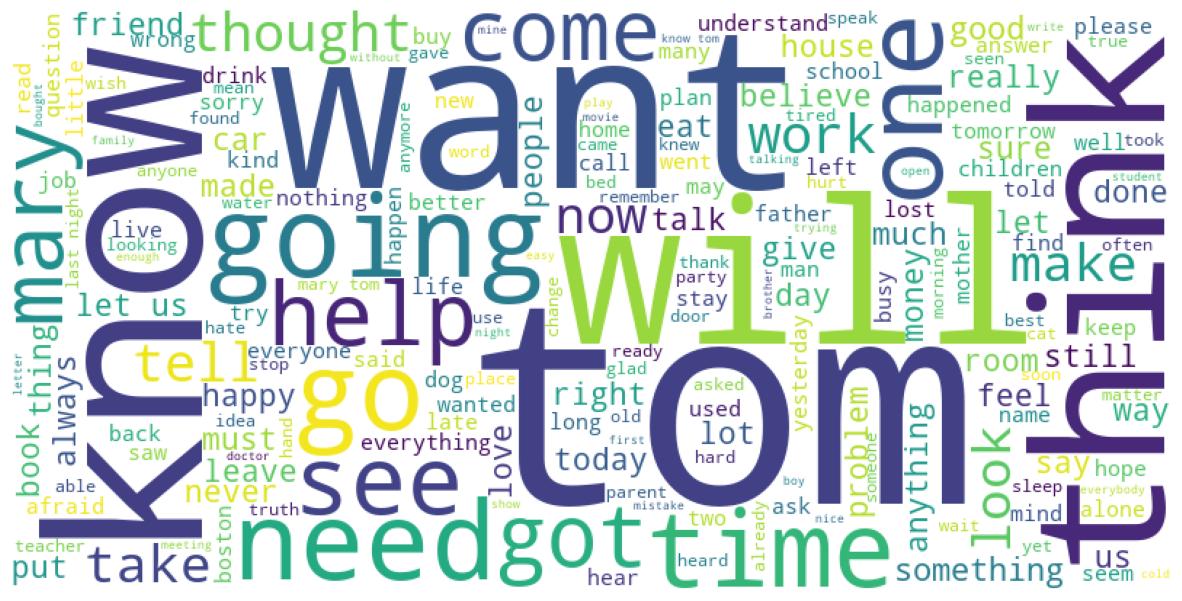

In [36]:
plot_word_cloud(dataframe.English)

#### French Word Cloud

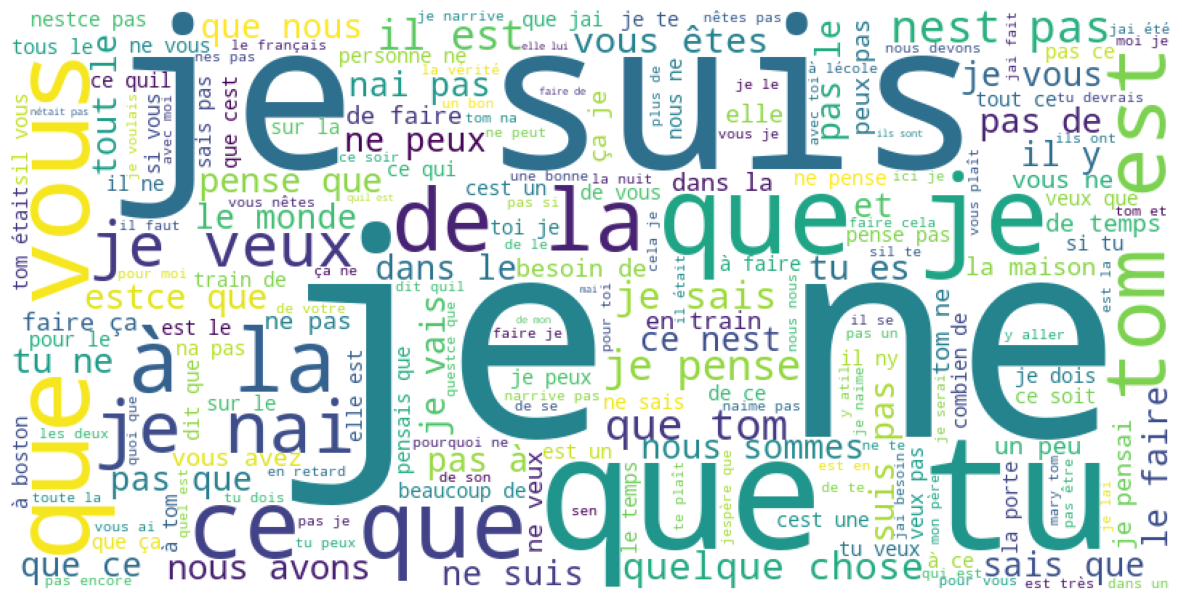

In [37]:
plot_word_cloud(dataframe.French)

### Preparing Data for Neural Machine Translation
- I will take the source language as French and target language as English.
#### Adding  Start and End tokens at the end of target sequence. For Example :
- Changing "hello" to "sos hello eos"
#### Why are we doing this?
- The sequence length of a sentence of one language is different from another language.
- The Encoder and decoder model would be able to determine the start and end of the target language.

In [38]:
def add_tokens(text) :
    '''This functions adds <START> and <END> tokens to target sentences'''
    return "sos " + text + " eos"

In [39]:
dataframe.English = dataframe.English.apply(add_tokens)

In [40]:
dataframe.sample(5)

,English,French,Eng_word_count,French_word_count,Eng_char_count,French_char_count
120269,sos i am glad you brought that up eos,je suis ravie que tu aies mis cela sur la table,7,11,29,47
69091,sos tom cannot work tonight eos,tom ne peut pas travailler ce soir,4,7,23,34
77463,sos this house is fireproof eos,cette maison est à lépreuve du feu,4,7,23,34
89018,sos a hurricanes coming soon eos,il va bientôt y avoir une tempête,4,7,24,33
222166,sos this company is indifferent to the safety ...,cette entreprise est indifférente à la sécurit...,10,10,56,63


### Splitting the data into train and test and Saving the results

#### Saving the complete cleaned dataset.

In [41]:
## saving the complete cleaned dataset.
dataframe.to_csv(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Cleaned_Data.csv', index=False)

#### Splitting data.

In [42]:
## splitting data.
X = dataframe.French
Y = dataframe.English

In [43]:
## creating training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(X, Y, random_state = 42)

#### saving training data.

In [44]:
## creating dataframe for training data.
train_data = pd.DataFrame()
train_data['Source'] = x_train
train_data['Target'] = y_train
## saving the dataframe to a csv file.
train_data.to_csv(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Train_data.csv', index = False)

#### saving testing data.

In [45]:
## creating dataframe for testing data.
test_data = pd.DataFrame()
test_data['Source'] = x_test
test_data['Target'] = y_test
## saving the dataframe to a csv file.
test_data.to_csv(r'C:\Users\Pratreek Sarna\Desktop\Data Science & Machine Learning Coding Ninjas\Project - Neural Machine Translation\Data_Files\Test_data.csv', index = False)